In [2]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Dataset 'All the news' available on Kaggle (https://www.kaggle.com/snapcrack/all-the-news)
#Import file

df = pd.read_csv('articles1.csv')

In [4]:
#Basic Exploratory analysis
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [11]:
df.isna().sum()

Unnamed: 0         0
id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

In [12]:
df.describe()

,Unnamed: 0,id,year,month,url
count,50000.000000,50000.000000,50000.000000,50000.000000,0.0
mean,25694.378380,44432.454800,2016.273700,5.508940,NaN
std,15350.143677,15773.615179,0.634694,3.333062,NaN
min,0.000000,17283.000000,2011.000000,1.000000,NaN
25%,12500.750000,31236.750000,2016.000000,3.000000,NaN
50%,25004.500000,43757.500000,2016.000000,5.000000,NaN
75%,38630.250000,57479.250000,2017.000000,8.000000,NaN
max,53291.000000,73469.000000,2017.000000,12.000000,NaN


In [13]:
#Let's select one article to test the model
article = 1810

In [22]:
#Get the article content
text = df.loc[article]['content']

In [25]:
text

'If your definition of a fine writing instrument is a plastic ballpoint with a smiling tooth and your dentist’s address printed along its side, then a visit to the Fountain Pen Hospital in Lower Manhattan might be revelatory. In its quiet interior, away from the bustle of Broadway, you can browse and try any of the thousands of fountain, rollerball or   ballpoint pens behind its glass cases. That includes a classic fountain pen like the $935 Montblanc Meisterstück, with an elegant gold nib and a piston ink filler inside its black barrel. Or collector bait like the   Krone, which, at $3, 920, features a portrait of Benjamin Franklin and, in its cap, a piece of one of his lightning rods. Or you can try the $55 Parker IM that writes so fluidly and precisely it seems capable of elevating not just your penmanship but also the thoughts you put on the page. James Hutchinson, a salesman known as Jimmy at the store, described a fountain pen’s effect: “It slows you down. It makes you think about

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\doug1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#Split text into sentences
from nltk.tokenize import sent_tokenize
sentences  = (sent_tokenize(text))


In [28]:
# Convert Text to lower case
clean_sentences = [frase.lower() for frase in sentences]


In [30]:
# remove punctuations, numbers and special characters using regex 
clean_sentences = pd.Series(clean_sentences).str.replace("[^a-zA-Z]", " ")

In [34]:

clean_sentences

0     if your definition of a fine writing instrumen...
1     in its quiet interior  away from the bustle of...
2     that includes a classic fountain pen like the ...
3     or collector bait like the   krone  which  at ...
4     or you can try the     parker im that writes s...
5     james hutchinson  a salesman known as jimmy at...
6         it makes you think about what you re writing 
7       the fountain pen hospital represents a bygon...
8     terry and steve wiederlight  who are brothers ...
9     after ballpoints hit the mass market in the   ...
10    when big chains like staples began to swallow ...
11    most of their business is now through online s...
12      they remain a destination for pen connoisseurs 
13    on a recent thursday morning  a gentleman came...
14    a doctor from montreal bought a rollerball wit...
15    daniel boggiano popped over from his office in...
16    his wife had inherited them from a   who clear...
17     they have a tremendous sentimental value 

In [35]:
#Remove white space
clean_sentences = clean_sentences.str.strip()


In [36]:
#Remove stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\doug1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [39]:
#Check Stop Words details
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [42]:
# function to remove stopwords
def remove_stopwords(s):
    clean_s = " ".join([i for i in s if i not in stop_words])
    return clean_s

In [43]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [44]:
clean_sentences[:10]

['definition fine writing instrument plastic ballpoint smiling tooth dentist address printed along side visit fountain pen hospital lower manhattan might revelatory',
 'quiet interior away bustle broadway browse try thousands fountain rollerball ballpoint pens behind glass cases',
 'includes classic fountain pen like montblanc meisterst ck elegant gold nib piston ink filler inside black barrel',
 'collector bait like krone features portrait benjamin franklin cap piece one lightning rods',
 'try parker im writes fluidly precisely seems capable elevating penmanship also thoughts put page',
 'james hutchinson salesman known jimmy store described fountain pen effect slows',
 'makes think writing',
 'fountain pen hospital represents bygone idea age instant communication still draws people across new york city storefront warren street',
 'terry steve wiederlight brothers current owners watched business established grandfather father ebb flow industry sea changes',
 'ballpoints hit mass marke

In [45]:
print(len(clean_sentences))


28


In [59]:
# Word embeddings
#I'm using pre trained word vectors created using Glove(https://nlp.stanford.edu/projects/glove/)

word_embeddings = {}
f = open('glove.6B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    w_vectors = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = w_vectors
f.close()

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

#Testing different pre trained Word Vectors to check for inconsistencies and/or opportunities
#I will run the cell above using differente files each time and test on the same set of words

#results for glove.6B.50d.txt 

print("Similarity Score of house and house", cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['house'].reshape(1,-1))[0][0])
print("Similarity Score of house and houses",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['houses'].reshape(1,-1))[0][0])
print("Similarity Score of house and home",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['home'].reshape(1,-1))[0][0])
print("Similarity Score of house and shirt",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['shirt'].reshape(1,-1))[0][0])


Similarity Score of house and house 0.99999994
Similarity Score of house and houses 0.7099165
Similarity Score of house and home 0.66091734
Similarity Score of house and shirt 0.33760405


In [56]:
#results for glove.6B.100d.txt 

print("Similarity Score of house and house", cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['house'].reshape(1,-1))[0][0])
print("Similarity Score of house and houses",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['houses'].reshape(1,-1))[0][0])
print("Similarity Score of house and home",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['home'].reshape(1,-1))[0][0])
print("Similarity Score of house and shirt",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['shirt'].reshape(1,-1))[0][0])


Similarity Score of house and house 1.0
Similarity Score of house and houses 0.6888046
Similarity Score of house and home 0.67203104
Similarity Score of house and shirt 0.27035105


In [58]:
#results for glove.6B.200d.txt 

print("Similarity Score of house and house", cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['house'].reshape(1,-1))[0][0])
print("Similarity Score of house and houses",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['houses'].reshape(1,-1))[0][0])
print("Similarity Score of house and home",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['home'].reshape(1,-1))[0][0])
print("Similarity Score of house and shirt",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['shirt'].reshape(1,-1))[0][0])


Similarity Score of house and house 1.0
Similarity Score of house and houses 0.679559
Similarity Score of house and home 0.57639885
Similarity Score of house and shirt 0.18106985


In [ ]:
#results for glove.6B.300d.txt 

print("Similarity Score of house and house", cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['house'].reshape(1,-1))[0][0])
print("Similarity Score of house and houses",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['houses'].reshape(1,-1))[0][0])
print("Similarity Score of house and home",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['home'].reshape(1,-1))[0][0])
print("Similarity Score of house and shirt",cosine_similarity(word_embeddings['house'].reshape(1, -1), word_embeddings['shirt'].reshape(1,-1))[0][0])


#### The results were consistent, even though they vary in magnitude. This difference is explained because the vectors were trained on datasets with different sizes. The smaller the training set the 'closer' the words are. Therefore they seem more similar in the first example - Glove 50d. 
#### Since my goal is to create a model that can analyze any kind of article (general purpose) I'll chose the the larger file.

In [61]:
# 400,000 word vectors
len(word_embeddings)

400000

In [63]:
#Check Vector size
len(word_embeddings.get('house'))

300

In [71]:
#Create sentence vectors
#I'll take the average of the sum of word vectors for each sentence. 

sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((300,))) for w in i.split()])/(len(i.split()))
  else:
    v = np.zeros((300,))
  sentence_vectors.append(v)

print(len(sentence_vectors))

28


In [67]:
#Import cosine similarity to calculate how strong is the relationship between each sentence
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

sim_matrix = sparse.csr_matrix(sentence_vectors)

similarities = cosine_similarity(sim_matrix)
print(similarities)

[[1.         0.68768569 0.62776    0.62422161 0.59028858 0.60110309
  0.63343191 0.74756129 0.52966643 0.56951462 0.60745038 0.69910133
  0.47546911 0.64431482 0.63536772 0.58804336 0.44276364 0.63281111
  0.61615565 0.50636929 0.63763863 0.53929985 0.57011798 0.496858
  0.57833033 0.68745517 0.73482022 0.        ]
 [0.68768569 1.         0.62170469 0.52355769 0.47029902 0.47503932
  0.44289666 0.64316516 0.40170339 0.53892873 0.56242807 0.63158352
  0.51062771 0.55974594 0.54884463 0.6144194  0.25451987 0.49955112
  0.54569503 0.41994848 0.56525394 0.39481109 0.46375258 0.34054694
  0.4335376  0.5397995  0.57747126 0.        ]
 [0.62776    0.62170469 1.         0.61216015 0.33373144 0.4957552
  0.40595361 0.48318706 0.29516263 0.35741202 0.54932865 0.53421922
  0.44852454 0.44119855 0.39344422 0.46671616 0.23091486 0.40750797
  0.58648732 0.29360082 0.48354852 0.36979415 0.31126942 0.3242864
  0.4040495  0.49360827 0.49362153 0.        ]
 [0.62422161 0.52355769 0.61216015 1.         0

In [69]:
#Now that I have a vector for each sentence, I'll transform it into a network graph and apply the Page rank algorithm to create a ranking 
import networkx as nx
G = nx.from_numpy_array(similarities)
scores = nx.pagerank(G, alpha=0.1)
G

In [70]:
#Export Graph file to be manipulated with Gephi
nx.write_gexf(G, "article1810.gexf")

C:\Users\doug1\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


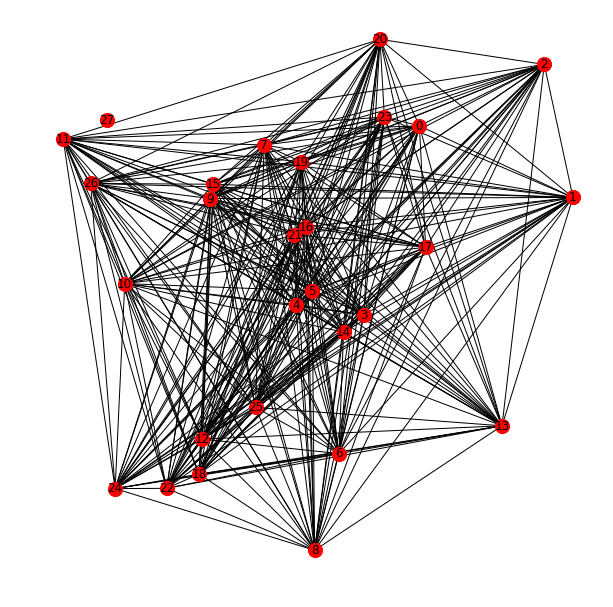

In [72]:
# Testing Graph generated with networkx package

plt.figure(figsize=(8,8))
nx.draw_random(G, node_size=200, with_labels=True)
plt.show()

In [76]:
display(scores)

{0: 0.03622986981470945,
 1: 0.03566832491721608,
 2: 0.035253872177570734,
 3: 0.035769778784690995,
 4: 0.03556368416619797,
 5: 0.03577739399616422,
 6: 0.03592092000236349,
 7: 0.0362762843304547,
 8: 0.03593166941274223,
 9: 0.035760300615929774,
 10: 0.03607072395326508,
 11: 0.036268627488447225,
 12: 0.034846354003503964,
 13: 0.03558589368732533,
 14: 0.03572842828870226,
 15: 0.035688638240413566,
 16: 0.034974392864784744,
 17: 0.03612516131481459,
 18: 0.03595380227806008,
 19: 0.03581808596920148,
 20: 0.03588792546416367,
 21: 0.035939890619907794,
 22: 0.035934611081767744,
 23: 0.035729971259844215,
 24: 0.036123214697867174,
 25: 0.036456693616610025,
 26: 0.036457422279707774,
 27: 0.032258064673573505}

In [77]:
#Extract top sentences
top_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)


In [78]:
#Extract less important sentences
bad_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=False)

In [80]:
# Extract top 10 sentences as the summary 
print(df['title'][article]) #Headline
print()
for i in range(5):
  print(top_sentences[i][1])

Where Fountain Pens Are Saved and Sold - The New York Times

When a person at a meeting “unscrews the top of a fountain pen,” she said, “everyone looks to see what he’s doing that puts him one step above.
’” To attract the younger generations, Ms. Brown contends, stores like this one must convey the message that a pen is also a mark of style.
” The Fountain Pen Hospital represents a bygone idea in an age of instant communication, but it still draws people from across New York City to its storefront at 10 Warren Street.
Most of their business is now through online sales, but they are among the last fountain pen sellers in the city that do repairs and carry replacement parts and ink.
If your definition of a fine writing instrument is a plastic ballpoint with a smiling tooth and your dentist’s address printed along its side, then a visit to the Fountain Pen Hospital in Lower Manhattan might be revelatory.


In [81]:
# Extract  10 less representative sentences for illustration purposes
for i in range(10):
  print(bad_sentences[i][1])

”
They remain a destination for pen connoisseurs.
His wife had inherited them from a   who clearly had impeccable taste.
That includes a classic fountain pen like the $935 Montblanc Meisterstück, with an elegant gold nib and a piston ink filler inside its black barrel.
Or you can try the $55 Parker IM that writes so fluidly and precisely it seems capable of elevating not just your penmanship but also the thoughts you put on the page.
On a recent Thursday morning, a gentleman came looking for a refill for his Caran d’Ache ballpoint.
In its quiet interior, away from the bustle of Broadway, you can browse and try any of the thousands of fountain, rollerball or   ballpoint pens behind its glass cases.
Daniel Boggiano popped over from his office in the Woolworth Building to pick up four vintage pens the store had repaired.
A doctor from Montreal bought a rollerball with a skeleton on it to delight his students back home.
But Ms. Brown said retirement didn’t much suit her.


In [86]:
#For evaluation purposes I'll compare the results to the automatic summarizer included in the GENSIM package

from gensim.summarization.summarizer import summarize
summarize(text, ratio=0.3, split=True)

['If your definition of a fine writing instrument is a plastic ballpoint with a smiling tooth and your dentist’s address printed along its side, then a visit to the Fountain Pen Hospital in Lower Manhattan might be revelatory.',
 'In its quiet interior, away from the bustle of Broadway, you can browse and try any of the thousands of fountain, rollerball or   ballpoint pens behind its glass cases.',
 'That includes a classic fountain pen like the $935 Montblanc Meisterstück, with an elegant gold nib and a piston ink filler inside its black barrel.',
 'When big chains like Staples began to swallow up that business in the ’90s, the Wiederlights returned to their roots, selling and repairing pens from 40 brands, including Aurora, Dupont and Waterman, as well as vintage finds.',
 'Most of their business is now through online sales, but they are among the last fountain pen sellers in the city that do repairs and carry replacement parts and ink.',
 'Daniel Boggiano popped over from his office

In [ ]:
#Lets Generate some other summaries

In [113]:
df2 = pd.read_csv('articles_selection.csv')

In [114]:
df2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459.0,151908.0,Alton Sterlingâ€™s son: â€™Everyone needs to p...,Guardian,Jessica Glenza,13/07/2016,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,NaN,NaN,Salesforce is buying data visualization compan...,TechCrunch,NaN,11/06/2019,2019.0,7.0,NaN,Salesforce’s plan to buy data-analytics compan...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
article = 1
text = df2.loc[article]['content']

In [116]:
#Split text into sentences
from nltk.tokenize import sent_tokenize
sentences  = (sent_tokenize(text))

clean_sentences = [frase.lower() for frase in sentences]

# remove punctuations, numbers and special characters using regex
clean_sentences = pd.Series(clean_sentences).str.replace("[^a-zA-Z]", " ")

#Remove white space
clean_sentences = clean_sentences.str.strip()

# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [117]:
#Create sentence vectors
#I'll take the average of the sum of word vectors for each sentence. 

sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((300,))) for w in i.split()])/(len(i.split()))
  else:
    v = np.zeros((300,))
  sentence_vectors.append(v)

print(len(sentence_vectors))

16


In [118]:
#Import cosine similarity to calculate how strong is the relationship between each sentence
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

sim_matrix = sparse.csr_matrix(sentence_vectors)

similarities = cosine_similarity(sim_matrix)
print(similarities)

[[1.         0.86279899 0.58464659 0.72095802 0.72488981 0.74762707
  0.619412   0.70549245 0.74243705 0.87977882 0.75523063 0.64109844
  0.66804414 0.84553893 0.65003941 0.76265712]
 [0.86279899 1.         0.61723732 0.76083263 0.79567843 0.78040117
  0.67175114 0.73172016 0.81309842 0.84673261 0.78656735 0.6550197
  0.64990547 0.85321051 0.61688719 0.75479654]
 [0.58464659 0.61723732 1.         0.62384502 0.56704685 0.67991402
  0.62849559 0.59614829 0.63830163 0.65560742 0.60505237 0.64234167
  0.45312026 0.63144347 0.62025502 0.63016802]
 [0.72095802 0.76083263 0.62384502 1.         0.69744232 0.82702216
  0.64551154 0.78150318 0.80959185 0.8309609  0.63647372 0.69898545
  0.50518724 0.78489651 0.74346603 0.6942446 ]
 [0.72488981 0.79567843 0.56704685 0.69744232 1.         0.76523285
  0.63821676 0.66155061 0.81207492 0.74331168 0.66164197 0.62574303
  0.57170939 0.75558335 0.57441922 0.68407439]
 [0.74762707 0.78040117 0.67991402 0.82702216 0.76523285 1.
  0.74224977 0.69526628 0.

In [119]:
#Now that I have a vector for each sentence, I'll transform it into a network graph and apply the Page rank algorithm to create a ranking 
import networkx as nx
G = nx.from_numpy_array(similarities)
scores = nx.pagerank(G, alpha=0.1)
G

In [120]:
#Extract top sentences
top_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

#Extract less important sentences
bad_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=False)

In [121]:
# Extract top 10 sentences as the summary 
print(df2['title'][article]) #Headline
print()
for i in range(5):
  print(top_sentences[i][1])

Salesforce is buying data visualization company Tableau for $15.7B in all-stock deal

As Wedbush Securities analyst Steve Koenig said, per Reuters, “Salesforce shares are trading down, may be out of fears that the company is buying growth because organic growth is slowing.”

Ultimately, Salesforce CEO Marc Benioff told analysts during a media briefing on Monday that by owning Tableau, Salesforce would be able to better court customers who are seeking a “completely strategic product line,” implying that companies are looking to buy enterprise software from companies that sell multiple products that work well together.
Google, for instance, said last week it plans to buy data analytics company Looker for $2.6 billion in a bid to sell services that let businesses merge and analyze corporate data that is stored in multiple databases or cloud services.
These companies are trying to keep up with current IT-purchasing trends, in which companies are increasingly buying business technology via 